# 프로젝트 제출

이 파일은, aiffel 2022년도 3기의 노드 중 하나인
 - EXPLORATION_SO3 : 1. Iris의 세 가지 품종, 분류해볼 수 있겠어요?
 
와 관련한 프로젝트입니다.
(저는 aiffel 교육생 김선중 입니다.)

프로젝트 결과물은 다음과 같이 구성해보았습니다.

## 목차
1. 사전 설명
    
    1.1. 목적
    
    1.2. 요약


2. 각 dataset에 대하여 분류문제 수행

    2.1. `digits` dataset
    
    2.2. `wine` dataset
    
    2.3. `breast_cancer` dataset


2. 결론

# 1. 사전 설명

## 1.1. 목적

`sklearn`에서 불러올 수 있는 세 개의 dataset `load_digits()`, `load_wine()`, `load_breast_cancer()`에 대하여 (이하 `digits`, `wine`, `breast_cancer`)
다섯 가지 종류의 모델(`decision tree`, `random forest`, `suppoer vector machine`,`stochastic gradient descent classifier`, `logistic regression`)을 사용하여 분류 문제를 수행합니다.

|평가문항|상세기준|
|:-|:-|
|데이터셋의 구성을 파악하고, 데이터를 이해하는 과정이 포함되어있는가?|feature와 label 선정을 위한 데이터 분석과정을 전개함|
|데이터셋에 대해 각각 5가지 모델을 이용하여 학습을 수행하고 결과값을 얻었는가?|모델학습 및 테스트가 정상적으로 수행되고, 결과값을 얻었음|
|데이터셋에 대해 모델의 평가 지표를 선택하고, 그 이유를 근거를 바탕으로 서술하였는가?|모델학습을 통해 얻은 결과물을 바탕으로 평가지표를 선택하고, 본인의 의견을 서술하였음|

평가문항이 위와 같으므로 (1) 데이터셋의 구성을 파악하고 데이터를 이해하는 과정, (2) 5가지 모델을 사용하여 학습을 수행하고결과를 얻는 것, (3) 각각의 데이터셋에 대하여 모델의 평가 지표를 선정해보려 했습니다.

각 모델의 평가지표를 출력할 때에 노드 중에 포함되어 있는 `accuracy_score(y_test, y_pred)`와 같은 코드는 쓰지 않고 `print(classification_report(y_test, y_pred))`와 같은 코드로만 사용했습니다.
전자는 accuracy만 출력하지만 후자는 accuracy를 포함한 다양한 평가지표를 모두 출력하므로 더 낫다고 판단했습니다.

각각의 코드 아래에는 markdown으로 설명을 적어보았습니다.

## 1.2. 요약

# 2. 각 dataset에 대하여 분류문제 수행

## 1.2. `digits` dataset

### 1.2.1 필요한 모듈 import 하기

In [47]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # _dt
from sklearn.ensemble import RandomForestClassifier # _rf
from sklearn import svm # _svm`
from sklearn.linear_model import SGDClassifier # _sgd
from sklearn.linear_model import LogisticRegression # _lr
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

모듈들을 import합니다.
 아래 모듈들은 모두 `sklearn`에서 제공하는 모듈들입니다.
 - line 1 : `digits` dataset을 불러오기 위해 `load_digits` 모듈을 import합니다.
 - line 2 : training set과 test set을 분리하기 위해 `train_test_split` 모듈을 import합니다.
 - line 3 ~ 7 : 다섯 개의 서로 다른 모델 (decision tree classifier, random forest classifier, support vector machine, stochastic gradient descent classifier, logistic regression)을 사용하기 위해 해당 모듈들을 import합니다.
 - line 8 : 모델의 평가지표를 한번에 불러오기 위해 `classification_report` 모듈을 import합니다.
 - line 9 ~ 11 : numpy와 matplotlib, pandas를 import합니다.

### 1.2.2 데이터 준비

In [2]:
digits = load_digits()
print(type(digits))
# print(digits)
print(dir(digits))
print(digits.keys())

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


 - line 1 : `load_digits()`으로 데이터를 불러와 `digits`에 할당합니다.
 - line 2, 3 : `digits`는 `sklearn.utils.Bunch`라는 타입을 가지고 있는데, [이것](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)은 `sklearn`에서 딕셔너리와 같은 역할을 하는 클래스인 것 같습니다.
 - line 4 : 파이썬의 내장함수 [`dir()`](https://docs.python.org/ko/3/library/functions.html#dir)을 사용합니다.
 - line 5 : `digits`의 키값을 `keys()` 메소드를 통해 호출합니다.
 `digits`의 key들이 나열되는데, 이 중 `data`, `target`, `target_names`, `DESCR`, `feature_names`를 살펴볼 예정입니다.
 노드에서의 `iris` dataset에 비교하면, `filename`이 없습니다.

### 1.2.3 데이터 이해하기

In [3]:
digits_data = digits.data
digits_label = digits.target

`digits_data`와 `digits_label`을 정의합니다.
 각각 input feature와 label의 역할을 하게 될 것들입니다.

In [4]:
print(type(digits_data))
print(digits_data.shape)
print(digits_data[0])

<class 'numpy.ndarray'>
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


`digits_data`의 타입과 shape, 첫번째 요소를 출력합니다.
 - line 1 : 타입은 `np.array`입니다.
 - line 2 : shape으로 보아 $1797\times 64$ 모양의 행렬입니다.
 즉, data의 개수는 1797개이고, feature는 64개입니다.
 feature의 개수가 64개인 것은, 각각의 sample들이 $8\times8$의 픽셀을 가진 그림파일이기 때문입니다.
 첫번째 sample을 그림으로 나타내면 다음과 같습니다.

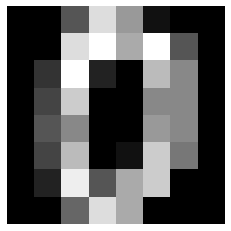

In [5]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

In [6]:
print(type(digits_label))
print(digits_label.shape)
print(digits_label[0])

<class 'numpy.ndarray'>
(1797,)
0


`digits_label`의 타입과 shape, 첫번째 요소를 출력합니다.
 - line 1 : 타입은 `np.array`입니다.
 - line 2 : shape으로 보아 1797 차원의 벡터라고 생각할 수 있습니다.
 각각의 sample들의 label은 $\{0,1,2,3,4,5,6,7,8,9\}$의 원소입니다.

In [7]:
print(digits.target_names)
print(digits.feature_names)
# print(digits.filename)
print(digits.DESCR)

[0 1 2 3 4 5 6 7 8 9]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteris

 - line 1 : label들의 이름을 출력합니다.
 방금 언급했듯 label은 $\{0,1,2,3,4,5,6,7,8,9\}$의 원소입니다.
 - line 2 : feature들의 이름을 출력합니다.
 위에 언급했듯, feature들은 $8\times8$의 그림파일의 각 픽셀값을 나타냅니다. 그걸 반영하듯 feature의 이름들이 `'pixel_2_3'`와 같이 되어 있습니다.
 좌표 (2,3)의 픽셀값이라는 뜻입니다.
 픽셀값이 0이면 해당 픽셀이 검은색을 나타내고 픽셀값이 255이면 해당 픽셀이 흰색을 나타냅니다.
 - line 3 : 2번 셀에서 말했듯 `filename`은 불러올 수 없습니다.
 - line 4 : `digits` dataset에 대한 상세한 정보를 출력합니다.

### 1.2.4 train, test 데이터 분리

In [49]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=1)

 - 우리는 데이터 `digits`에서 각각 `digits_data`, `digits_label`를 얻었었습니다.
 이것들을 각각 8:2의 비율로 잘라, training set과 test set으로 나눕니다.
 즉
    - `digits_data` → `X_train`, `X_test`
    - `digits_label` → `y_train`, `y_test`
 
 와 같이 나눕니다.

In [50]:
print(type(X_train))
print(X_train.shape)
print(X_train[0])

print(type(X_test))
print(X_test.shape)
print(X_test[0])

print(type(y_train))
print(y_train.shape)
print(y_train[0])

print(type(y_test))
print(y_test.shape)
print(y_test[0])

<class 'numpy.ndarray'>
(1437, 64)
[ 0.  0.  0.  2. 15.  8.  0.  0.  0.  0.  1. 15. 13.  3.  0.  0.  0.  0.
  9. 13.  1.  0.  0.  0.  0.  1. 15.  6.  0.  5. 11.  0.  0.  7. 14.  0.
  1. 15.  8.  0.  0.  8. 15.  9. 15. 16.  3.  0.  0.  1. 11. 16. 16. 10.
  0.  0.  0.  0.  0.  2. 15.  5.  0.  0.]
<class 'numpy.ndarray'>
(360, 64)
[ 0.  0.  6. 16. 11.  0.  0.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  4.  0.  0.  0.  0. 10. 16. 13.  0.  0.  0.  0.  0. 13. 16.
 12.  0.  0.  0.  0.  0. 10. 16.  9.  0.  0.  0.  0.  0.  9. 16. 10.  0.
  0.  0.  0.  0.  4. 15. 16.  3.  0.  0.]
<class 'numpy.ndarray'>
(1437,)
4
<class 'numpy.ndarray'>
(360,)
1


네 개의 서로다른 `np.array`들에 대하여 타입과 shape, 첫번째 요소를 출력해봅니다.
 - line 1 ~ 3 : `X_train`은 $1437\times 64$ 형태의 행렬입니다.
 열의 개수, 즉 sample의 개수는 당연히 일정하고 행의 개수는 1797에서 1437개로 약 80%가 되었습니다.
 정확히 계산해보면 $1797\times 0.8=1437.6$이므로 1797에 0.8을 곱한 후 `floor()`같은 것을 씌워 정수부분만 출력한 듯합니다.
 [공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)에는 정확히 나와있지 않습니다.
 - line 5 ~ 7 : `X_test`은 $360\times 64$ 형태의 행렬입니다.
 - line 9 ~ 11 : `y_train`은 1437차원의 벡터입니다.
 - line 13 ~ 15 : `y_test`은 360차원의 벡터입니다.

### 1.11.5. 다양한 모델로 학습시켜보기

여기에서는 다섯 개의 모델
 - decision tree classifier # _dt
 - random forest classifier # _rf
 - support vector machine # _svm
 - stochastic gradient descent classfier # sgd
 - logistic regression # _lr
 
을 가지고 학습을 진행시키고, 그 결과로 여러 평가지표를 얻는 작업을 수행합니다.
평가지표는 `y_pred_dt`와 같은 이름으로 출력됩니다.
이때, 각각의 모델들에 따라 `y_pred`의 뒤에 접두어 `dt`를 붙였습니다.
`dt`는 decision tree라는 뜻입니다.
 
이 과정을 앞으로 세 번 반복할 것이고, 또 어차피 결과적으로
 - `y_pred_dt`
 - `y_pred_rf`
 - `y_pred_svm`
 - `y_pred_sgd`
 - `y_pred_lr`

의 다섯개만 잘 출력하면 되므로 이 과정을 하나의 함수 `get_y_pred`로 지정해놓았습니다.

여기에서는 다섯 개의 모델
 - decision tree classifier # _dt
 - random forest classifier # _rf
 - support vector machine # _svm
 - stochastic gradient descent classfier # sgd
 - logistic regression # _lr
 
을 가지고 학습을 진행시키고, 그 결과로 여러 평가지표를 얻는 작업을 수행합니다.
평가지표는 `y_pred_dt`와 같은 이름으로 출력됩니다.
이때, 각각의 모델들에 따라 `y_pred`의 뒤에 접두어 `dt`를 붙였습니다.
`dt`는 decision tree라는 뜻입니다.
 
이 과정을 앞으로 세 번 반복할 것이고, 또 어차피 결과적으로
 - `y_pred_dt`
 - `y_pred_rf`
 - `y_pred_svm`
 - `y_pred_sgd`
 - `y_pred_lr`

의 다섯개만 잘 출력하면 되므로 이 과정을 하나의 함수 `get_y_pred`로 지정해놓았습니다.

In [10]:
# decision tree
# _dt
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [11]:
# random forest
# _rf
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [12]:
# support vector machine
# _svm
svm_model = svm.SVC(random_state=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [13]:
# stochastic gradient descent classifier
# sgd
sgd_model = SGDClassifier(random_state=1)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

In [14]:
# logistic regerssion
# _lr
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 1.11.6. 모델을 평가해보기

In [15]:
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.91      0.83      0.87        35
           2       0.83      0.83      0.83        36
           3       0.78      0.71      0.74        41
           4       0.82      0.84      0.83        38
           5       0.78      0.97      0.87        30
           6       0.88      0.97      0.92        37
           7       0.78      0.76      0.77        37
           8       0.83      0.86      0.85        29
           9       0.75      0.71      0.73        34

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00 

## 1.12. 프로젝트 (2) load_wine : 와인을 분류해 봅시다 

### 1.12.1 필요한 모듈 import 하기

In [16]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # _dt
from sklearn.ensemble import RandomForestClassifier # _rf
from sklearn import svm # _svm
from sklearn.linear_model import SGDClassifier # _sgd
from sklearn.linear_model import LogisticRegression # _lr
from sklearn.metrics import classification_report

### 1.12.2 데이터 준비

In [17]:
wine = load_wine()

In [18]:
print(dir(wine))
print(wine.keys())

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


### 1.12.3 데이터 이해하기

In [19]:
wine_data = wine.data
wine_label = wine.target

In [20]:
print(type(wine_data))
print(wine_data.shape)
print(wine_data[0])

<class 'numpy.ndarray'>
(178, 13)
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]


In [21]:
print(type(wine_label))
print(wine_label.shape)
print(wine_label[0])

<class 'numpy.ndarray'>
(178,)
0


In [22]:
print(wine.target_names)
print(wine.DESCR)
print(wine.feature_names)
# print(wine.filename)

['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
   

### 1.12.4 train, test 데이터 분리

In [23]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [24]:
print(type(X_train))
print(X_train.shape)
print(X_train[0])

print(type(X_test))
print(X_test.shape)
print(X_test[0])

print(type(y_train))
print(y_train.shape)
print(y_train[0])

print(type(y_test))
print(y_test.shape)
print(y_test[0])

<class 'numpy.ndarray'>
(142, 13)
[ 12.     1.51   2.42  22.    86.     1.45   1.25   0.5    1.63   3.6
   1.05   2.65 450.  ]
<class 'numpy.ndarray'>
(36, 13)
[1.369e+01 3.260e+00 2.540e+00 2.000e+01 1.070e+02 1.830e+00 5.600e-01
 5.000e-01 8.000e-01 5.880e+00 9.600e-01 1.820e+00 6.800e+02]
<class 'numpy.ndarray'>
(142,)
1
<class 'numpy.ndarray'>
(36,)
2


### 1.12.5. 다양한 모델로 학습시켜보기

In [25]:
# decision tree
# _dt
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [26]:
# random forest
# _rf
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [27]:
# support vector machine
# _svm
svm_model = svm.SVC(random_state=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [28]:
# stochastic gradient descent classifier
# sgd
sgd_model = SGDClassifier(random_state=1)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

In [29]:
# logistic regerssion
# _lr
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 1.12.6. 모델을 평가해보기

In [30]:
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.75      0.92      0.83        13
           2       1.00      0.67      0.80         9

    accuracy                           0.86        36
   macro avg       0.89      0.84      0.85        36
weighted avg       0.88      0.86      0.86        36

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.58      0.85      0.69        13
           2       0.20      0.11      0.14         9

    accuracy        

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 여기서는 minmax scaling을 해봤다.

In [51]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.    , 0.    , 0.    , ..., 0.3125, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.8125, 0.75  , 0.125 ],
       ...,
       [0.    , 0.    , 0.4375, ..., 0.8125, 0.125 , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.0625, 0.    ],
       [0.    , 0.    , 0.5   , ..., 0.    , 0.    , 0.    ]])

In [48]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [52]:
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[0.    , 0.    , 0.375 , ..., 0.1875, 0.    , 0.    ],
       [0.    , 1.    , 0.8125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.25  , ..., 0.375 , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.0625, 0.    , 0.    ],
       [0.    , 0.375 , 0.9375, ..., 1.    , 1.    , 0.125 ],
       [0.    , 0.    , 0.5   , ..., 0.    , 0.    , 0.    ]])

In [53]:
# logistic regerssion
# _lr
logistic_model = LogisticRegression()
logistic_model.fit(X_train_minmax, y_train)
y_pred_lr = logistic_model.predict(X_test_minmax)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 1.13. 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

### 1.13.1 필요한 모듈 import 하기

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # _dt
from sklearn.ensemble import RandomForestClassifier # _rf
from sklearn import svm # _svm
from sklearn.linear_model import SGDClassifier # _sgd
from sklearn.linear_model import LogisticRegression # _lr
from sklearn.metrics import classification_report

### 1.13.2 데이터 준비

In [32]:
breast_cancer = load_breast_cancer()

In [33]:
print(dir(breast_cancer))
print(breast_cancer.keys())

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


### 1.13.3 데이터 이해하기

In [34]:
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

In [35]:
print(type(breast_cancer_data))
print(breast_cancer_data.shape)
print(breast_cancer_data[0])

<class 'numpy.ndarray'>
(569, 30)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [36]:
print(type(breast_cancer_label))
print(breast_cancer_label.shape)
print(breast_cancer_label[0])

<class 'numpy.ndarray'>
(569,)
0


In [37]:
print(breast_cancer.target_names)
print(breast_cancer.DESCR)
print(breast_cancer.feature_names)
# print(breast_cancer.filename)

['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instanc

### 1.13.4 train, test 데이터 분리

In [38]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [39]:
print(type(X_train))
print(X_train.shape)
print(X_train[0])

print(type(X_test))
print(X_test.shape)
print(X_test[0])

print(type(y_train))
print(y_train.shape)
print(y_train[0])

print(type(y_test))
print(y_test.shape)
print(y_test[0])

<class 'numpy.ndarray'>
(455, 30)
[1.799e+01 2.066e+01 1.178e+02 9.917e+02 1.036e-01 1.304e-01 1.201e-01
 8.824e-02 1.992e-01 6.069e-02 4.537e-01 8.733e-01 3.061e+00 4.981e+01
 7.231e-03 2.772e-02 2.509e-02 1.480e-02 1.414e-02 3.336e-03 2.108e+01
 2.541e+01 1.381e+02 1.349e+03 1.482e-01 3.735e-01 3.301e-01 1.974e-01
 3.060e-01 8.503e-02]
<class 'numpy.ndarray'>
(114, 30)
[1.469e+01 1.398e+01 9.822e+01 6.561e+02 1.031e-01 1.836e-01 1.450e-01
 6.300e-02 2.086e-01 7.406e-02 5.462e-01 1.511e+00 4.795e+00 4.945e+01
 9.976e-03 5.244e-02 5.278e-02 1.580e-02 2.653e-02 5.444e-03 1.646e+01
 1.834e+01 1.141e+02 8.092e+02 1.312e-01 3.635e-01 3.219e-01 1.108e-01
 2.827e-01 9.208e-02]
<class 'numpy.ndarray'>
(455,)
0
<class 'numpy.ndarray'>
(114,)
1


### 1.13.5. 다양한 모델로 학습시켜보기

In [40]:
# decision tree
# _dt
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [41]:
# random forest
# _rf
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [42]:
# support vector machine
# _svm
svm_model = svm.SVC(random_state=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [43]:
# stochastic gradient descent classifier
# sgd
sgd_model = SGDClassifier(random_state=1)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

In [44]:
# logistic regerssion
# _lr
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 1.13.6. 모델을 평가해보기

In [45]:
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        42
           1       0.93      0.99      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        42
           1       0.87      1.00      0.93        72

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114

              preci